In [1]:
import tdms_readraw

In [2]:
from nptdms import TdmsFile

In [3]:
#onFile = TdmsFile("200305/24119FID_tuningFID_on_8db_after.tdms")
#offFile = TdmsFile("200305/24120FID_tuningFID_off_8db_after.tdms")
onFile = TdmsFile("200305/24122FID_tuningFID_on_8db_after_0.tdms")
offFile = TdmsFile("200305/24121FID_tuningFID_off_8db_after_0.tdms")

In [4]:
ax_on, spec_on, desc_on = tdms_readraw.tdms_readraw(onFile)
ax_off, spec_off, desc_off = tdms_readraw.tdms_readraw(offFile)

In [5]:
ax_on

{'title': '1. Tuning FID',
 'sweepax': [{'t': 'T',
   'dim': 1250,
   'size': 1250,
   'reps': 1000,
   'var': ['a', 'b']},
  {'t': 'S', 'dim': 2, 'size': 1, 'reps': 1, 'var': ['ph']},
  {'t': 'P',
   'dim': 1,
   'size': 1,
   'reps': 1,
   'var': ['RepTime', 't90', 'delay', 'f1', 'phref', 'Sampling']}],
 'shots': 2000,
 'x': array([0.0000e+00, 6.4000e-09, 1.2800e-08, ..., 7.9808e-06, 7.9872e-06,
        7.9936e-06]),
 'xlabel': 'a, s',
 'StartTime': numpy.datetime64('2020-03-05T16:40:17.000000'),
 'FinishTime': numpy.datetime64('2020-03-05T16:40:17.000000'),
 'ExpTime': '0h 0min 0s',
 'RepTime': 1.9999999999999998e-05}

In [6]:
times = ax_on['x'] * 1e6  # make us

In [7]:
on = spec_on[:,0,0,0]

In [8]:
off = spec_off[:,0,0,0]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


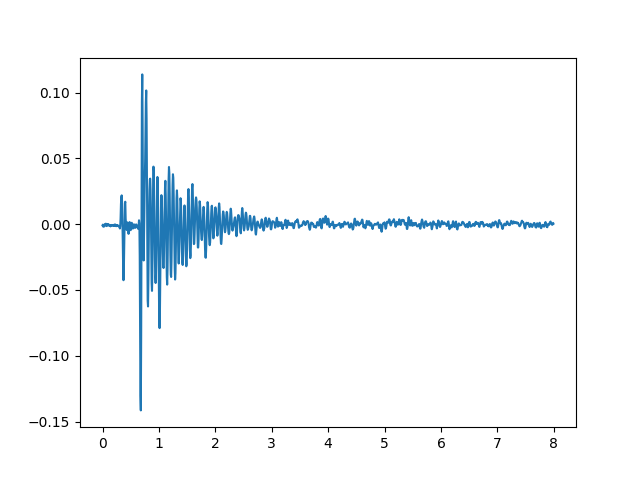

In [29]:
plt.plot(times, np.real(on))


In [11]:
plt.plot(times, np.real(off))

In [12]:
subtracted = on - off

In [13]:
plt.plot(times, np.real(subtracted))

In [14]:
numCut = 106

In [15]:
plt.plot(times[numCut:], np.real(subtracted[numCut:]))

In [16]:
t = times[numCut:]

In [17]:
data = subtracted[numCut:]

In [18]:
onFile.object("params").properties

OrderedDict([('ph', '1 step 1;p;PPL variable'),
             ('RepTime', '20 us;p;PPL variable'),
             ('t90', '60 ns;p;PPL variable'),
             ('delay', '0 s;p;PPL variable'),
             ('f1', '717.242 MHz;p;PPL variable'),
             ('phref', '-12 deg;p;PPL variable'),
             ('Sampling', '6.4 ns;p;Sampling@DG')])

In [19]:
onFile.object("axis").properties

OrderedDict([('transient', 'T,1250,1000,a,b'),
             ('sweep0', 'S,2,1,ph'),
             ('sweep1', 'P,1,1,RepTime,t90,delay,f1,phref,Sampling'),
             ('PackAxis', 0),
             ('MaxSeqPerShot', 1)])

In [20]:
onFile.object("streams", "Re").properties

OrderedDict([('unit', 'V'),
             ('triggers', 1),
             ('scans', 1),
             ('dims', 1),
             ('dim1', 1250),
             ('dim2', 1),
             ('dim3', 1),
             ('dim4', 1),
             ('dwelltime', 6.4e-09)])

In [21]:
t

array([0.6784, 0.6848, 0.6912, ..., 7.9808, 7.9872, 7.9936])

In [50]:
dataFFT = np.fft.fft(data, n=2048)

In [51]:
dataFFT

array([0.2688867 -0.24638674j, 0.31368125+0.08138835j,
       0.20983331-0.12521809j, ..., 0.37256988+0.29507039j,
       0.50590417-0.18193505j, 0.39306338+0.00055114j])

<IPython.core.display.Javascript object>


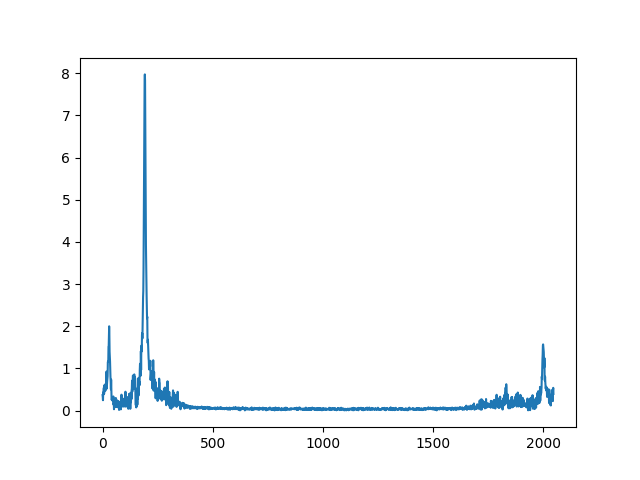

In [53]:
plt.plot(np.abs(dataFFT))

In [54]:
sampleSpacing = (t[1]-t[0])*1e-6

In [56]:
freq = np.fft.fftfreq(dataFFT.size, sampleSpacing)

In [40]:
freq

array([      0.        ,  136582.16783217,  273164.33566434, ...,
       -409746.50349651, -273164.33566434, -136582.16783217])

<IPython.core.display.Javascript object>


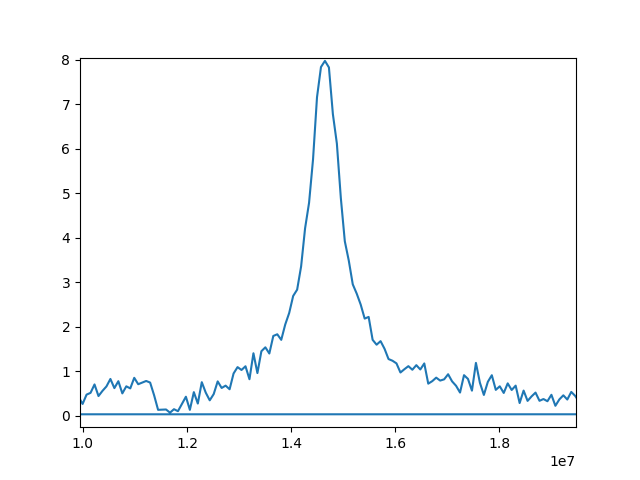

In [57]:
plt.plot(freq, np.abs(dataFFT))

In [61]:
amax = np.argmax(np.abs(dataFFT))

In [59]:
import scipy

In [92]:
def voigt(x, scale, mean, sigma, gamma):
    return scale * scipy.special.voigt_profile(x-mean, sigma, gamma)
    

In [68]:
import scipy.optimize

In [72]:
scipy.optimize.curve_fit(voigt, freq[amax-100:amax+100], dataFFT[amax-100:amax+100].real, p0=[1.4e7, 1e7, 1e7])

(array([-4.36190315e+09,  2.67708706e+08,  2.88504856e+08]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

<IPython.core.display.Javascript object>


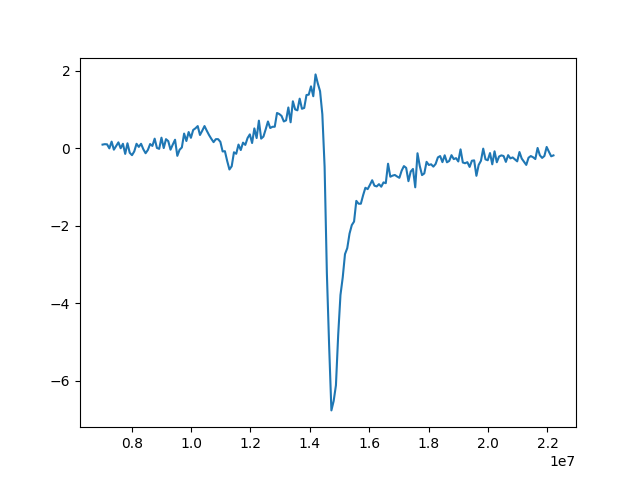

In [73]:
plt.plot(freq[amax-100:amax+100], dataFFT[amax-100:amax+100].real)

In [81]:
np.angle(dataFFT[amax])

-2.2640511216219106

In [85]:
dataFFTRot = dataFFT * np.exp(-1j * np.angle(dataFFT[amax]))

<IPython.core.display.Javascript object>


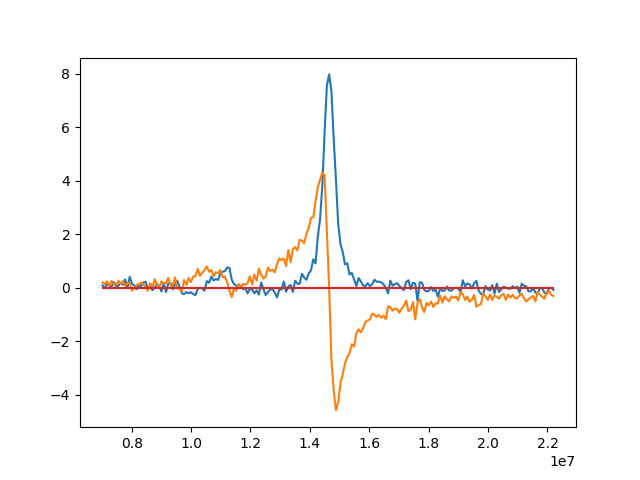

In [88]:
plt.plot(freq[amax-100:amax+100], dataFFTRot[amax-100:amax+100].real)

In [89]:
plt.plot(freq[amax-100:amax+100], dataFFTRot[amax-100:amax+100].imag)

In [94]:
scipy.optimize.curve_fit(voigt, freq[amax-100:amax+100], dataFFTRot[amax-100:amax+100].real, p0=[1.0, 1.4e7, 1e7, 1e7])

(array([1.99817520e+00, 1.42314358e+07, 2.93185677e+05, 2.37757994e+06]),
 array([[ 4.94673627e+12, -4.13881769e+15, -7.81818120e+18,
          9.18710187e+18],
        [-4.13881769e+15,  6.59452102e+24, -6.92137352e+23,
          1.33008140e+23],
        [-7.81818120e+18, -6.92137352e+23,  8.28851432e+25,
         -3.43578993e+25],
        [ 9.18710187e+18,  1.33008140e+23, -3.43578993e+25,
          2.94951752e+25]]))

<IPython.core.display.Javascript object>


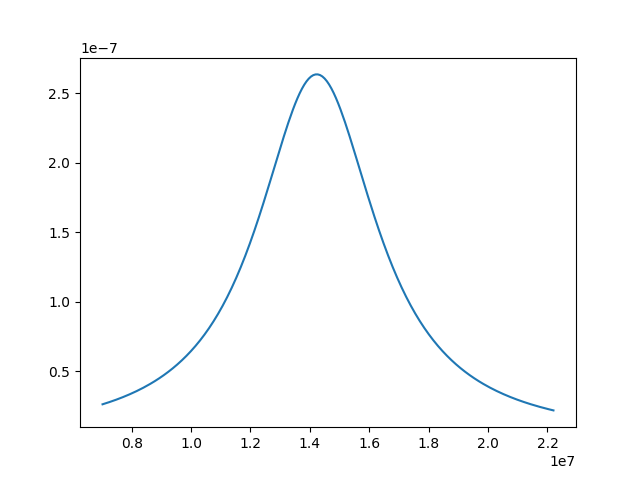

In [96]:
plt.plot(freq[amax-100:amax+100], voigt(freq[amax-100:amax+100], 1.99817520e+00, 1.42314358e+07, 2.93185677e+05, 2.37757994e+06))

In [131]:
w = 10

<IPython.core.display.Javascript object>


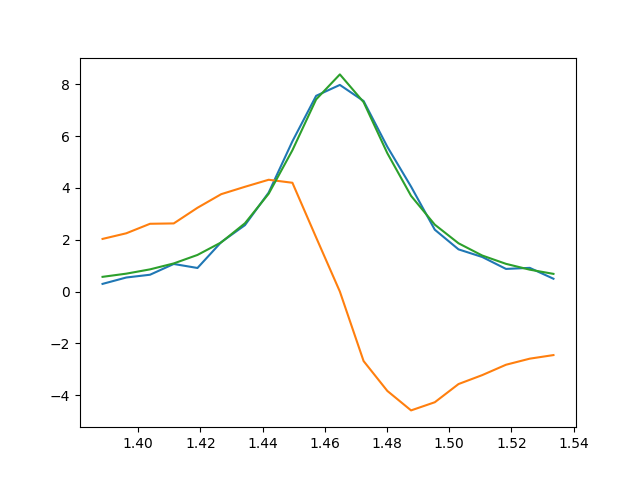

In [132]:

plt.plot(freq[amax-w:amax+w]*1e-7, dataFFTRot[amax-w:amax+w].real)

In [133]:
plt.plot(freq[amax-w:amax+w]*1e-7, dataFFTRot[amax-w:amax+w].imag)

In [134]:
scipy.optimize.curve_fit(L, freq[amax-w:amax+w]*1e-7, dataFFTRot[amax-w:amax+w].real)

(array([1.46461744, 0.53987732, 0.02051363]),
 array([[1.78752021e-07, 9.66853730e-09, 5.41064085e-10],
        [9.66853730e-09, 1.30943148e-04, 5.11049898e-06],
        [5.41064085e-10, 5.11049898e-06, 3.80055954e-07]]))

In [135]:
plt.plot(freq[amax-w:amax+w]*1e-7, L(freq[amax-w:amax+w]*1e-7, 1.46461744, 0.53987732, 0.02051363))

In [129]:
def V(x, mean, scale, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(scipy.special.wofz((x - mean + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi)


In [130]:
def L(x, mean, scale, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return scale * gamma / np.pi / ((x-mean)**2 + gamma**2)


In [142]:
def epr_Lorentzian(x, x0, fwhm):
    xc = 2*(x-x0)/fwhm
    return 2/np.pi/fwhm *(1-1j*xc)/(1+xc*xc)

In [138]:
np.array((2.0, 3.0)) * np.array((5.0, 4.0))

array([10., 12.])

In [143]:
scipy.optimize.curve_fit(epr_Lorentzian, freq[amax-w:amax+w]*1e-7, dataFFTRot[amax-w:amax+w].real)

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

error: Result from function call is not a proper array of floats.